In [1]:
import pandas as pd

In [2]:
from pandas import read_csv
from datetime import datetime


def parse(x):
    return datetime.strptime(x, '%d%b%Y').strftime('%Y %m %d')


dataset = read_csv('gasoline.csv', parse_dates=['date'],
                   index_col=0, date_parser=parse)

/usr/local/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:466: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [5]:
# dataset.drop(['mts_id', 'intid', 'marke', 'year', 'month', 'day', 'vehicles1',
#               'latitudezst', 'longitudezst', 'brentl', 'd1', 'zst1'],
#              axis=1, inplace=True)

df = dataset[['latitude', 'longitude']]

df = df.drop_duplicates()

# test = dataset['marke'][~dataset['marke'].isnull()][:1000]
# .str.lower().value_counts().shape

In [14]:
df.dropna(inplace=True)
# pd.get_dummies(test.str.lower())
# dataset.drop(['marke'], axis=1, inplace=True)
# dataset.keys()

In [5]:
# th = dataset[:1000]
# th.set_index('date', inplace=True)
dataset.set_index('date', inplace=True)

In [6]:
# # need to find global mean of gas on each day
# global_mean = th.groupby('date')['e5gas'].mean()
# # if the dates match, that value is the value for 'global_mean'
# # pd.concat([th, global_mean], keys='date', axis=1)
# df = global_mean.to_frame()
# df.rename(columns={"e5gas": "global_mean"}, inplace=True)
# sp = pd.merge(th, df, left_index=True, right_index=True)

global_mean = dataset.groupby('date')['e5gas'].mean()
df = global_mean.to_frame()
df.rename(columns={"e5gas": "global_mean"}, inplace=True)
sp = pd.merge(dataset, df, left_index=True, right_index=True)

In [7]:
sp.keys()
print(sp.shape)
sp.dropna(inplace=True)
print(sp.shape)

(8270468, 17)
(8162756, 17)


In [6]:
# magic command to display matplotlib plots inline within the ipython notebook
%matplotlib inline

# import necessary modules
import pandas as pd, numpy as np, matplotlib.pyplot as plt, time
from sklearn.cluster import DBSCAN
from sklearn import metrics
from geopy.distance import great_circle
from shapely.geometry import MultiPoint

In [15]:
# define the number of kilometers in one radian
kms_per_radian = 6371.0088

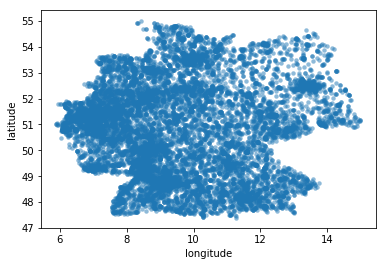

In [16]:
# scatterplot it to get a sense of what it looks like
df = df.sort_values(by=['latitude', 'longitude'])
ax = df.plot(kind='scatter', x='longitude', y='latitude', alpha=0.5, linewidth=0)

In [17]:
# represent points consistently as (lat, lon)
coords = df.as_matrix(columns=['latitude', 'longitude'])

# define epsilon as 10 kilometers, converted to radians for use by haversine
epsilon = 10 / kms_per_radian

In [68]:
start_time = time.time()
db = DBSCAN(eps=epsilon, min_samples=20, algorithm='ball_tree', metric='haversine').fit(np.radians(coords))
cluster_labels = db.labels_
unique_labels = set(cluster_labels)

# get the number of clusters
num_clusters = len(set(cluster_labels))

(20, 3)
(61, 3)
(97, 3)
(187, 3)
(212, 3)
(528, 3)
(596, 3)
(616, 3)
(698, 3)
(719, 3)
(780, 3)
(6208, 3)
(6222, 3)
(6254, 3)
(6277, 3)
(6329, 3)
(6354, 3)
(6385, 3)
(6451, 3)
(6614, 3)
(6634, 3)
(6895, 3)
(6919, 3)
(6962, 3)
(7039, 3)
(7067, 3)
(7098, 3)
(7134, 3)
(7173, 3)
(7221, 3)
(7359, 3)
(7380, 3)
(7424, 3)
(7471, 3)
(7558, 3)
(7645, 3)
(7696, 3)
(7716, 3)
(7757, 3)
(7779, 3)
(7819, 3)
(7837, 3)
(7898, 3)
(7912, 3)
(8090, 3)
(8110, 3)
(8118, 3)
(8556, 3)
(8595, 3)
(8639, 3)
(8813, 3)
(8874, 3)
(8910, 3)
(8946, 3)
(9382, 3)
(9403, 3)
(9449, 3)
(9481, 3)
(9508, 3)
(9561, 3)
(9592, 3)
(9633, 3)
(9691, 3)
(9718, 3)
(9749, 3)
(14698, 3)


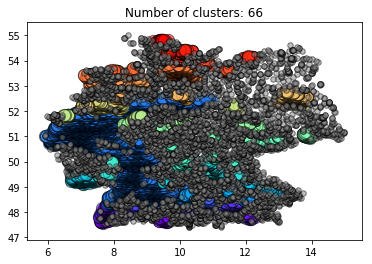

In [69]:
# get colors and plot all the points, color-coded by cluster (or gray if not in any cluster, aka noise)
fig, ax = plt.subplots()
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))

group_df = pd.DataFrame(columns=['lon', 'lat', 'group'])

# for each cluster label and color, plot the cluster's points
for cluster_label, color in zip(unique_labels, colors):
    
    size = 150
    if cluster_label == -1: #make the noise (which is labeled -1) appear as smaller gray points
        color = 'gray'
        size = 30
    
    # plot the points that match the current cluster label
    x_coords = coords[cluster_labels==cluster_label][:,1]
    y_coords = coords[cluster_labels==cluster_label][:,0]
    ax.scatter(x=x_coords, y=y_coords, c=color, edgecolor='k', s=size, alpha=0.5)
    
    temp_df = pd.DataFrame(columns=['lon', 'lat', 'group'])
    
    labels = [cluster_label] * len(x_coords)
    
    temp_df['lon'] = pd.Series(x_coords)
    temp_df['lat'] = pd.Series(y_coords)
    temp_df['group'] = pd.Series(labels)
    
    group_df = group_df.append(temp_df)
    
    print(group_df.shape)

ax.set_title('Number of clusters: {}'.format(num_clusters))
plt.show()

In [67]:
group_df.head()

,lon,lat,group
0,11.2659,47.399502,0
1,11.2633,47.444901,0
2,11.2371,47.484600,0
3,11.1131,47.490200,0
4,11.0743,47.490601,0
